<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.2: Boosting

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9429
    - **ROC AUC**  = 0.9333
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _30_ features labelled in either **benign** or **malignant** classes. The features have _569_ instances out of which _13_ feature values from concave points standard error and _13_ feature values from concave points standard error are missing. The dataset contains numeric values for all values with the exception of diagnosis, which is B for benign and M for malignant.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
* What is the mean size of cells? <br> 
* How many tests are positive for cancer ? <br>
* How many tests have a low compact mean? <br> 
* Are all samples symmetrical? <br> 


## Actual Question
How many test are classified as malignant? (M).

In [1]:
# XGBoost example adopted from Kaggle:

# Using XGBoost to predict Breast Cancer
# https://www.kaggle.com/cesartrevisan/using-xgboost-to-predict-breast-cancer

# Import system library - to set directories
import os

# Import data science libraries
# linear algebra
import numpy as np
from scipy import stats

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# import visualisation lbraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import SciKit Learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import xgboost to boost outcome
import xgboost as xgb

# Step 2: Find the Data
### Wisconsin Breast Cancer Dataset
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. WIlliam H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [2]:
# Set the data directory
os.chdir('/home/mike/Documents/mkp_code/Institute of Data Course/Data')

In [3]:
# Wisconsin Breast Cancer dataset 
# Source: Kaggle
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

cancer_data = pd.read_csv('datasets_180_408_data.csv')

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [4]:
# Cancer dataframe eda
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

    ***EDA adopted from Kaggle:*** <br> 
    Breast Cancer Wisconsin - EDA <br>
    https://www.kaggle.com/shaunthesheep/breast-cancer-wisconsin-eda/

In [5]:
# check the dataframe structure
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Drop the Unnamed and id columns:
cancer_data.drop(['Unnamed: 32','id'], axis=1, inplace=True)

In [7]:
# Change Char to numeric
cancer_data["diagnosis"].replace("B",0, inplace = True)
cancer_data["diagnosis"].replace("M",1, inplace = True)

In [8]:
# Check the Statistical Profile:
cancer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


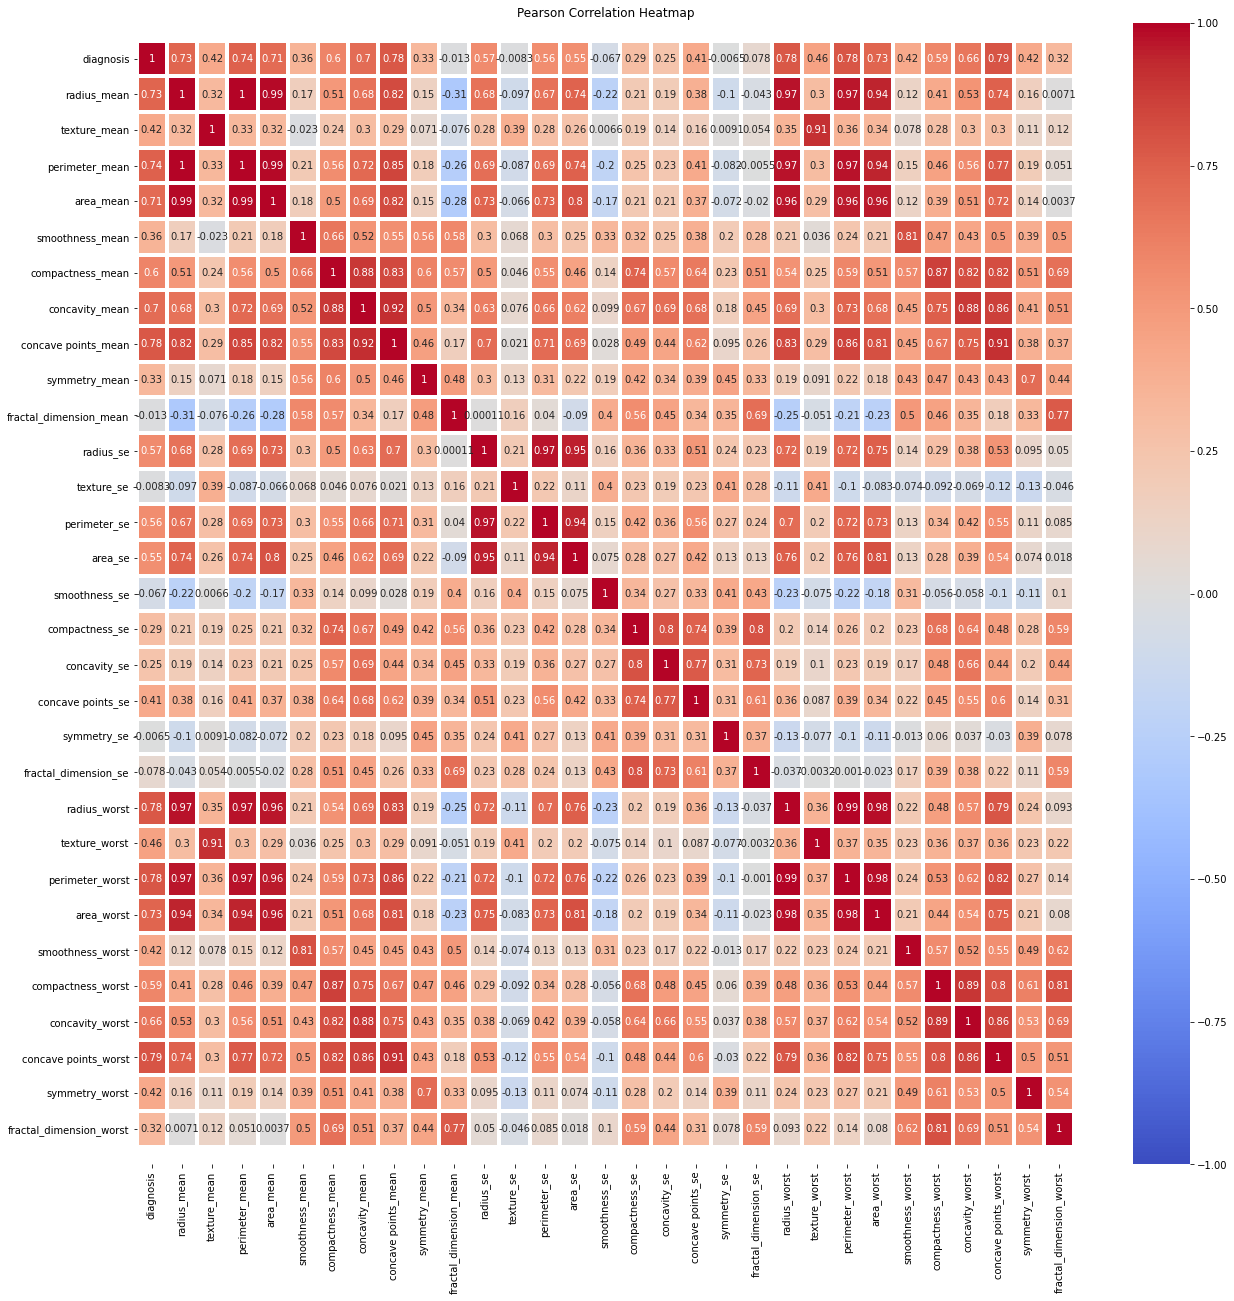

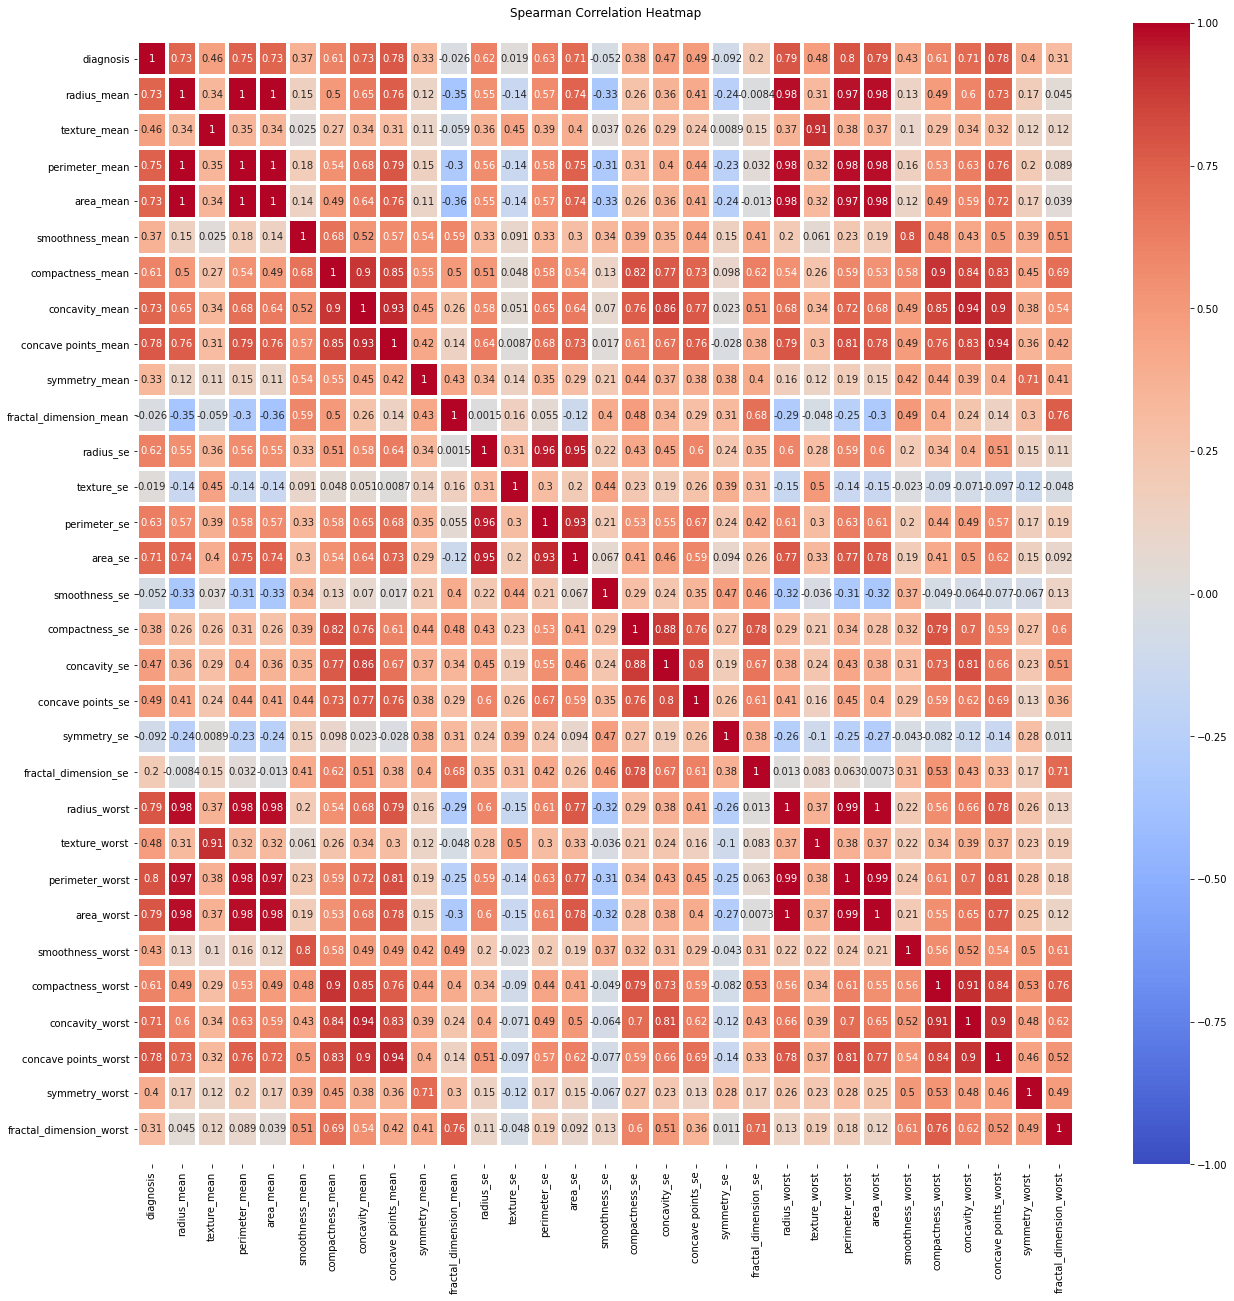

In [9]:
plt.figure(figsize=(21,21))
plt.title("Pearson Correlation Heatmap")
corr = cancer_data.corr(method='pearson')
mask = np.tril(cancer_data.corr())
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot = True, # to show the correlation degree on cell
           vmin=-1,
           vmax=1,
           center= 0,
           fmt='0.2g', #
           cmap= 'coolwarm',
           linewidths=3, # cells partioning line width
           linecolor='white', # for spacing line color between cells
           square=False,#to make cells square 
           cbar_kws= {'orientation': 'vertical'}
           )

b, t = plt.ylim() 
b += 0.5  
t -= 0.5  
plt.ylim(b,t) 
plt.show()
################################################################################
plt.figure(figsize=(21,21))
plt.title("Spearman Correlation Heatmap")
corr = cancer_data.corr(method='spearman')
mask = np.tril(cancer_data.corr())
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot = True, # to show the correlation degree on cell
           vmin=-1,
           vmax=1,
           center= 0,
           fmt='0.2g', #
           cmap= 'coolwarm',
           linewidths=3, # cells partioning line width
           linecolor='white', # for spacing line color between cells
           square=False,#to make cells square 
           cbar_kws= {'orientation': 'vertical'}
           )

b, t = plt.ylim() 
b += 0.5  
t -= 0.5  
plt.ylim(b,t) 
plt.show()

In [10]:
#Sort dataframe columns by their mean value 
sorted_mean_df = pd.DataFrame(np.random.randn(5,31), columns=list(cancer_data.columns))

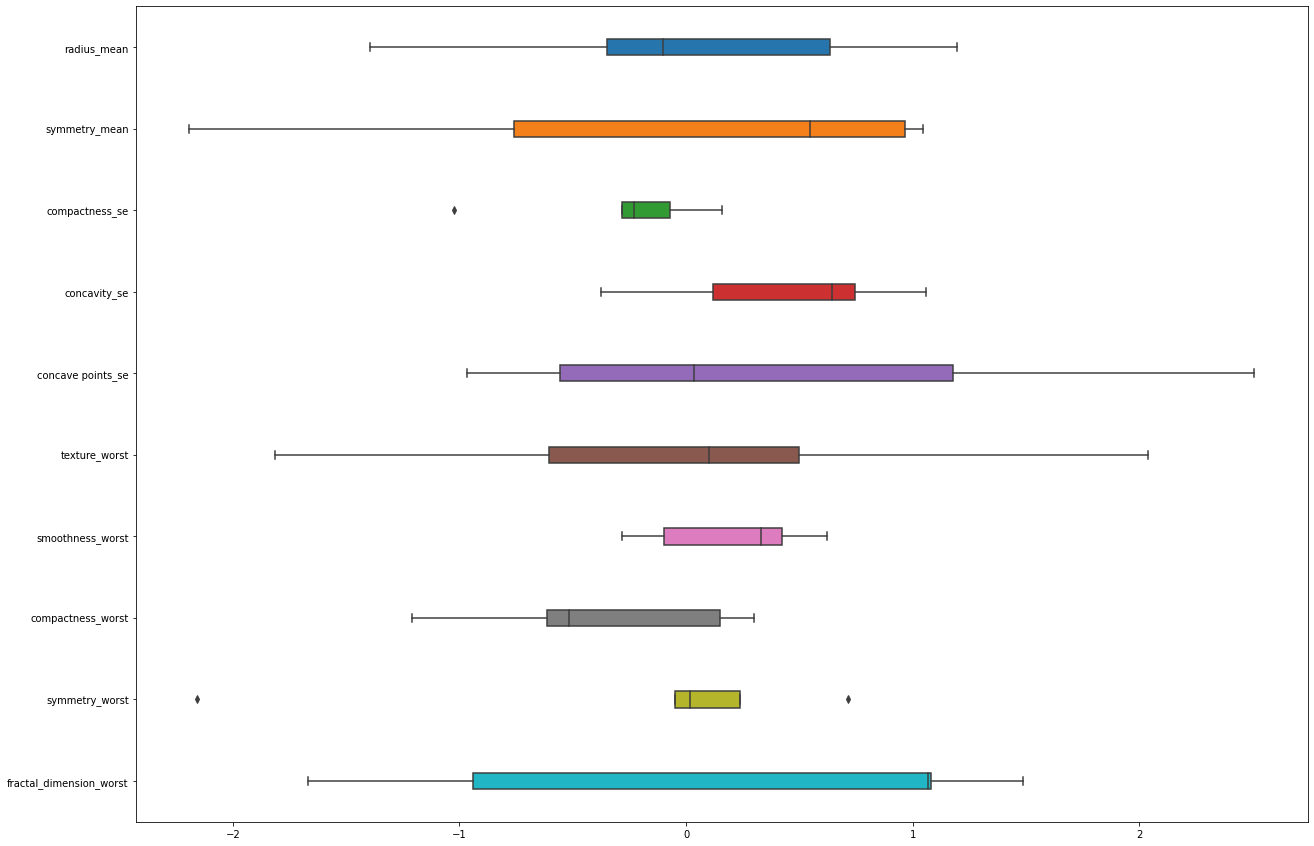

In [11]:
plt.figure(figsize=(21,15))
sns.boxplot(data= sorted_mean_df[['radius_mean','symmetry_mean','compactness_se','concavity_se','concave points_se','texture_worst','smoothness_worst','compactness_worst','symmetry_worst', 'fractal_dimension_worst']],
                                   orient='h',
                                   width=0.2,
                                   saturation=0.9) 

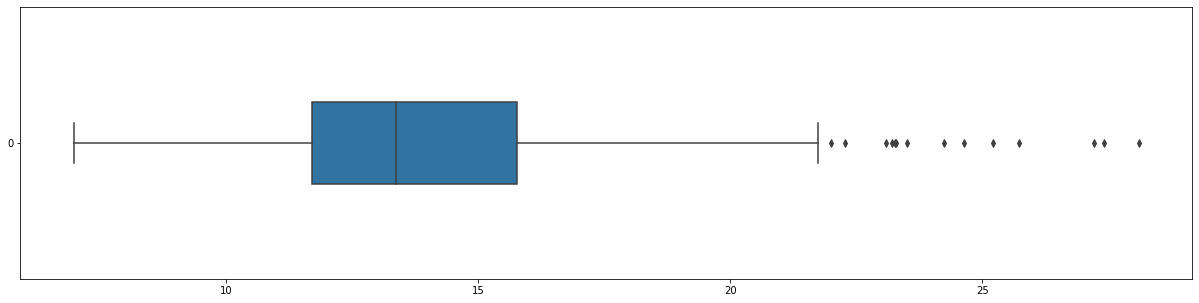

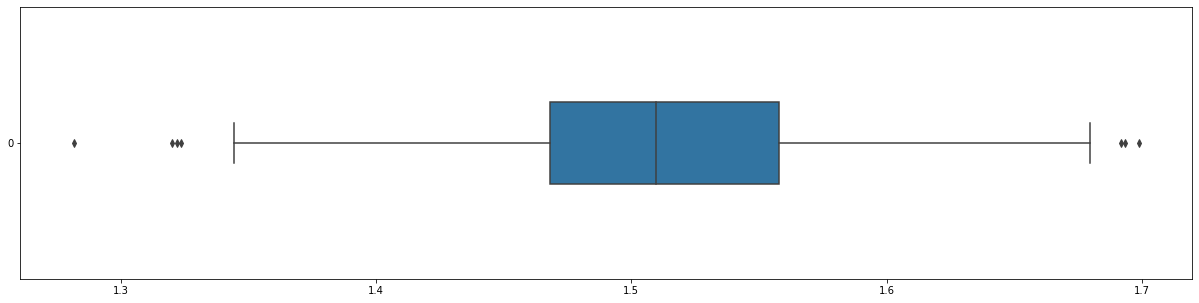

In [12]:
# Plot the radius mean - non-standardised and standardised

dd = pd.DataFrame()
dd,lambdaChanges = stats.boxcox(cancer_data['radius_mean'])
plt.figure(figsize=(21,5))
sns.boxplot(data = cancer_data['radius_mean'],orient='h',width=0.3)
plt.figure(figsize=(21,5))
sns.boxplot(data=dd,orient='h',width=0.3)


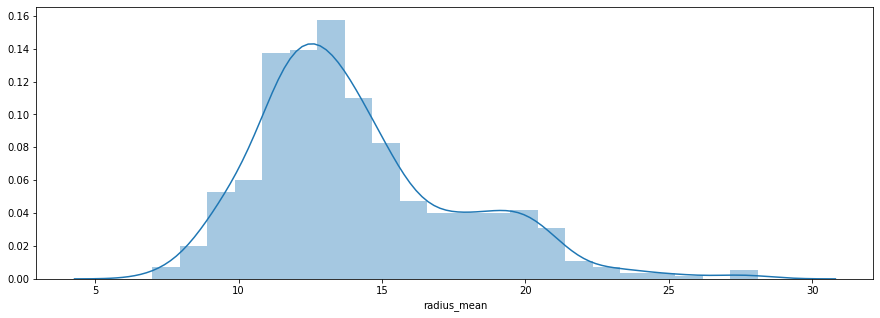

In [13]:
# Histogram - original data
plt.figure(figsize=(15,5))
sns.distplot(cancer_data['radius_mean'])

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [14]:
y = cancer_data["diagnosis"]

In [24]:
# Normalise the data for fitting to the model
X = cancer_data.drop("diagnosis", axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

### _XGBoost_ <br>
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. <br>

**Note:**
This method works better on larger datasets

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [18]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [19]:
# Initialise the model - training data
model = xgb.XGBClassifier().fit(X_train, y_train)

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [20]:
# make prediction - training data
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [21]:
# Initialise the model - test data
model = xgb.XGBClassifier().fit(X_test, y_test)

In [22]:
# make prediction - test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

The Wisconsin Breast Cancer dataset produces high accuracy with all machine learing models. XGBoost does improve the accuracy from 95% to 100%, but this result is on a demonstration dataset. However, the result does suggest significant accuracy improvements are possible for larger datasets.

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



